Практика 4.1
Машинное обучение на больших данных

1.Скачаем данные train.csv

2.Исключим признаки, которые на ваш взгляд, могут привести к переобучению

In [21]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [22]:
df_data = pd.read_csv("train.csv")
df_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Посмотрим описание данных для общего понимания

In [23]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


К переобучению, как правило, приводят:
1. Мультиколлинеарность
2. Наличие неинформативных признаков
3. Слишком мало данных
В нашем случае это наличие неиформативных признаков: "PassengerId", "Name", "Ticket", "Cabin"
Удалим их

In [24]:
df_data.drop(["PassengerId", "Name", "Ticket", "Cabin"],axis=1, inplace=True)
df_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Очистим наши данные от Nan

In [25]:
df_data.drop(df_data[pd.isna(df_data["Fare"])].index, axis=0, inplace=True)
df_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Очистим наши данные от дублей

In [26]:
df_data = df_data[df_data.duplicated()==False]
df_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Заполним пропущенные значения средними по столбцу

In [27]:
df_data_age_mean = int(df_data["Age"].mean())
df_data.loc[pd.isna(df_data["Age"]), "Age"] = df_data_age_mean
df_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,29.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


3. Разделим выборку на train и test.

In [39]:
df_train, df_test = train_test_split(df_data, test_size=0.7, random_state=12345)
f_train = df_train.drop('Survived', axis=1) 
f_test = df_test.drop('Survived', axis=1) 

target_train = df_train['Survived'] 
target_test = df_test['Survived'] 

print(f"Размер выборки train: {f_train.shape}")
print(f"Размер выборки test: {f_test.shape}")

Размер выборки train: (234, 2)
Размер выборки test: (546, 2)


4. Преобразуем категориальные признаки с помощью sklearn.preprocessing.OneHotEncoder, а некатегориальные с помощью sklearn.preprocessing.StandardScaler

In [29]:
categ = ["Sex", "Embarked", 'Pclass', 'SibSp', 'Parch']

ohe = OneHotEncoder(drop='first')
data_ohe = ohe.fit_transform(df_data[categ].values)
df_ohe = pd.DataFrame(data_ohe.toarray(), columns=ohe.get_feature_names_out())
df_data.drop(categ, axis=1, inplace=True)

df_data_ohe = df_data.join(df_ohe, how ="inner")

df_data_ohe.head(10)

,Survived,Age,Fare,x0_male,x1_Q,x1_S,x1_nan,x2_2,x2_3,x3_1,...,x3_3,x3_4,x3_5,x3_8,x4_1,x4_2,x4_3,x4_4,x4_5,x4_6
0,0,22.0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,38.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,26.0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,35.0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35.0,8.0500,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,29.0,8.4583,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,54.0,51.8625,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,2.0,21.0750,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1,27.0,11.1333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1,14.0,30.0708,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
scaler_train = StandardScaler()
tar_col = ['Age', 'Fare']
scaler_train.fit(f_train[tar_col])

scaler_test = StandardScaler()
scaler_test.fit(f_test[tar_col])

f_train[tar_col] = scaler_train.transform(f_train[tar_col])
f_test[tar_col] = scaler_test.transform(f_test[tar_col])

f_train.head(10)

,Age,Fare
448,-1.785568,-0.271333
44,-0.766740,-0.466853
872,0.252088,-0.516325
712,1.343690,0.291249
82,-0.039005,-0.468429
591,1.634784,0.742574
386,-2.076662,0.203618
149,0.907049,-0.378865
600,-0.402873,-0.138312
222,1.562010,-0.463918


5. Обучим модели логистической регрессии и KNN, посчитаем все метрики классификаци

In [45]:
# Логистическая регрессия
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

model_lr = LogisticRegression(random_state=42)

# Search for best hyperparameters f1
lregressor_params = {'solver':solver}
grid_f1 = GridSearchCV(model_lr, 
                    lregressor_params,
                    cv=5,
                    verbose=0,
                    scoring='f1')
grid_f1.fit(f_train, target_train)

# Search for best hyperparameters accuracy
grid_acc = GridSearchCV(model_lr, 
                    lregressor_params,
                    cv=5,
                    verbose=0,
                    scoring='accuracy')
grid_acc.fit(f_train, target_train)

# Search for best hyperparameters roc_auc
grid_roc = GridSearchCV(model_lr, 
                    lregressor_params,
                    cv=5,
                    verbose=0,
                    scoring='roc_auc')
grid_roc.fit(f_train, target_train)

print("\n{}: f1 = {}".format(grid_f1.best_params_, grid_f1.best_score_))
print("{}: accuracy = {}".format(grid_acc.best_params_, grid_acc.best_score_))
print("{}: roc_auc = {}".format(grid_roc.best_params_, grid_roc.best_score_))


{'solver': 'newton-cg'}: f1 = 0.40299355816597193
{'solver': 'newton-cg'}: accuracy = 0.6498612395929695
{'solver': 'liblinear'}: roc_auc = 0.6724380395433027


In [43]:
# KNN
hp_candidates = [{'n_neighbors': [2, 3, 4 , 5, 6, 7, 8], 
                  'weights': ['uniform','distance', 'callable'],
                  'p':[1, 2, 5, 7]}]

model_knn = KNeighborsClassifier()

# Search for best hyperparameters f1
grid_f1 = GridSearchCV(model_knn, 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=0,  
                      scoring='f1')
grid_f1.fit(f_train, target_train)

# Search for best hyperparameters accuracy
grid_acc = GridSearchCV(model_knn, 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=0,  
                      scoring='accuracy')
grid_acc.fit(f_train, target_train)

# Search for best hyperparameters roc_auc
grid_roc = GridSearchCV(model_knn, 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=0,  
                      scoring='roc_auc')
grid_roc.fit(f_train, target_train)


print("\n{}: f1 = {}".format(grid_f1.best_params_, grid_f1.best_score_))
print("{}: accuracy = {}".format(grid_acc.best_params_, grid_acc.best_score_))
print("{}: roc_auc = {}".format(grid_roc.best_params_, grid_roc.best_score_))


{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}: f1 = 0.5616006216006216
{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}: accuracy = 0.654209065679926
{'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}: roc_auc = 0.6811333890281258


Выводы
1 Лучший показатель f1-меры и roc_auc дала модель KNN: f1 = 0.56, roc_auc = 0.68
2 Accuracy при нашем дисбалансе классов не имеет должной информативности



6_1 Обучение модели случайного леса

In [48]:
# Define our candidate hyperparameters
max_deth_values = range(1, 12)
max_n_estimators = range(1, 100, 10)
rforest_params = {'max_depth':max_deth_values, "n_estimators": max_n_estimators}

model_rfc = RandomForestClassifier(random_state=12345, class_weight='balanced')

# Search for best hyperparameters f1
grid_f1 = GridSearchCV(model_rfc, 
                      rforest_params, 
                      cv=2,
                      verbose=0,  
                      scoring='f1')
grid_f1.fit(f_train, target_train)

# Search for best hyperparameters accuracy
grid_acc = GridSearchCV(model_rfc, 
                      rforest_params, 
                      cv=2,
                      verbose=0,  
                      scoring='accuracy')
grid_acc.fit(f_train, target_train)

# Search for best hyperparameters roc_auc
grid_roc = GridSearchCV(model_rfc, 
                      rforest_params, 
                      cv=2,
                      verbose=0,  
                      scoring='roc_auc')
grid_roc.fit(f_train, target_train)


print("\n{}: f1 = {}".format(grid_f1.best_params_, grid_f1.best_score_))
print("{}: accuracy = {}".format(grid_acc.best_params_, grid_acc.best_score_))
print("{}: roc_auc = {}".format(grid_roc.best_params_, grid_roc.best_score_))


{'max_depth': 2, 'n_estimators': 21}: f1 = 0.5754795663052544
{'max_depth': 8, 'n_estimators': 41}: accuracy = 0.6452991452991452
{'max_depth': 7, 'n_estimators': 81}: roc_auc = 0.6475748590370468


6_2 Обучение модели дерева решений

In [54]:
# Define our candidate hyperparameters
max_deth_values = range(1, 15)
tree_params = {'max_depth':max_deth_values}

model_dtc = DecisionTreeClassifier(random_state=12345)

# Search for best hyperparameters f1
grid_f1 = GridSearchCV(model_dtc, 
                      tree_params, 
                      cv=5,
                      verbose=0,  
                      scoring='f1')
grid_f1.fit(f_train, target_train)

# Search for best hyperparameters accuracy
grid_acc = GridSearchCV(model_dtc, 
                      tree_params, 
                      cv=5,
                      verbose=0,  
                      scoring='accuracy')
grid_acc.fit(f_train, target_train)

# Search for best hyperparameters roc_auc
grid_roc = GridSearchCV(model_dtc, 
                      tree_params, 
                      cv=5,
                      verbose=0,  
                      scoring='roc_auc')
grid_roc.fit(f_train, target_train)


print("\n{}: f1 = {}".format(grid_f1.best_params_, grid_f1.best_score_))
print("{}: accuracy = {}".format(grid_acc.best_params_, grid_acc.best_score_))
print("{}: roc_auc = {}".format(grid_roc.best_params_, grid_roc.best_score_))


{'max_depth': 13}: f1 = 0.5176319176319176
{'max_depth': 3}: accuracy = 0.6708603145235893
{'max_depth': 3}: roc_auc = 0.6568991924255082


Выводы
1. Лчший показатель f1-меры дала модель случайного леса f1 = 0.57
2. Лучший показатель roc_auc дала модель дерева решений roc_auc= 0.65
3. Дерево решений - значительно более быстрая, чем случайный лес.
4. f1 и roc_auc утойчивы к несбалансированным классам и показывают лучшее соотношение precision и recall



7. Подсчитаем метрики моделей случайного леса и дерева решений

In [55]:
#Применим class_weight='balanced' для ухода от дисбаланса
model_rfc = RandomForestClassifier(random_state=12345, max_depth=2, n_estimators=41, class_weight='balanced')
model_rfc.fit(f_train, target_train)

predict_model_rfc = model_rfc.predict(f_test)

print(f"Метрика f1_score равна: {f1_score(target_test, predict_model_rfc)}")

Метрика f1_score равна: 0.6020618556701032


In [56]:
probabilities_test = model_rfc.predict_proba(f_test)
auc_roc = roc_auc_score(target_test, probabilities_test[:, 1])

print(f"Метрика auc_roc равна: {auc_roc}")

Метрика auc_roc равна: 0.6947716570229103


Выводы

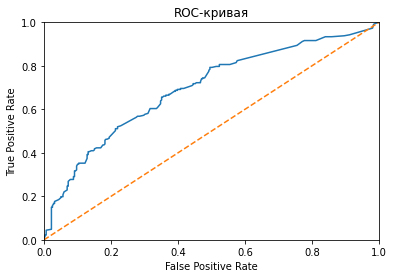

In [57]:
#Построим для наглядности график roc от roc_auc
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test[:, 1])
plt.figure()
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

1. Использованные данные все еще довольно "сырые" и можно значительно улучшить результат их дополнительной предварительной обработкой
2. Полученная модель дает стабильный приемлемый результат и пригодна для использования.

